In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset

In [2]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\digitdataset1",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\-',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\(',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\÷',
]

In [3]:
X, y = load_dataset(folder_path=folder_paths)

In [4]:
X.shape

torch.Size([104366, 1, 28, 28])

In [8]:
X = X.reshape(-1, 28*28)
X.shape

torch.Size([104366, 784])

In [7]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [13]:
X.mean(axis=0, keepdim=True).shape

torch.Size([1, 784])

In [12]:
X -= X.mean(axis=0, keepdim=True)
X.shape

torch.Size([104366, 784])

In [19]:
cov = X.T @ X
cov.shape

torch.Size([784, 784])

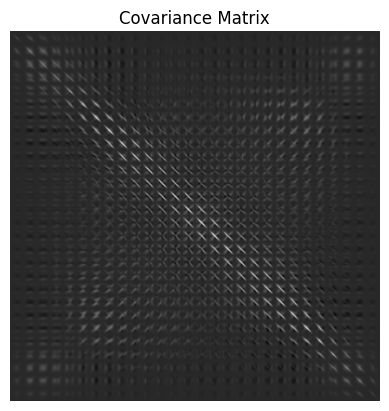

In [21]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [29]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95076172, 0.95228647, 0.95380796, 0.95532619, 0.95684117,
       0.95830401, 0.95977011, 0.9612297 , 0.96268277, 0.9641391 ,
       0.96551724, 0.96696706, 0.96841361, 0.96985691, 0.97129695,
       0.9726816 , 0.97407603, 0.9754672 , 0.97685511, 0.97814854,
       0.97952993, 0.98082662, 0.9822015 , 0.98350145, 0.98487307,
       0.98624143, 0.9875316 , 0.98889671, 0.99025856, 0.99146076,
       0.99253916, 0.99362082, 0.99470574, 0.99590468, 0.99699286,
       0.99769007, 0.99839054, 0.9990845 , 1.        ])

In [32]:
W = eigenvectors[:, :745]
W.shape

torch.Size([784, 745])

In [34]:
new_X = W.T @ X.T 

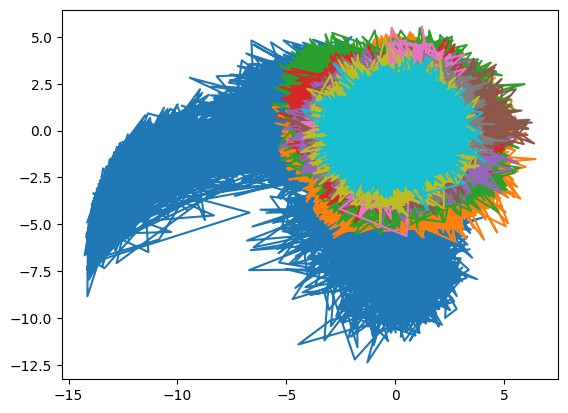

In [36]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9], new_X[10], new_X[11], new_X[12], new_X[13], new_X[14], new_X[15], new_X[16], new_X[17], new_X[18], new_X[19])
